In [ ]:
%pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.6/26.6 MB 27.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 43.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.2/38.2 MB 10.9 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.16.2
    Uninstalling scipy-1.16.2:
      Successfully uninstalled scipy-1.16.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatib

In [ ]:
%pip install transformers

In [ ]:
import kagglehub
path = kagglehub.dataset_download("abhi8923shriv/sentiment-analysis-dataset")
print("Path to dataset files:", path)

100%|██████████| 54.4M/54.4M [00:01<00:00, 28.6MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/abhi8923shriv/sentiment-analysis-dataset/versions/9


In [ ]:
import os
dataset_path = path
print(os.listdir(dataset_path))

['train.csv', 'training.1600000.processed.noemoticon.csv', 'test.csv', 'testdata.manual.2009.06.14.csv']


In [ ]:
import pandas as pd
file_path = os.path.join(dataset_path, 'train.csv')
df = pd.read_csv(file_path, encoding='latin-1')

In [ ]:
df.head()

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346,652860.0,60
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797,27400.0,105
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044,2381740.0,18
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265,470.0,164
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola,32866272,1246700.0,26


In [ ]:
display(df.head())
df.info()
print(df.isnull().sum())

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346,652860.0,60
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797,27400.0,105
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044,2381740.0,18
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265,470.0,164
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola,32866272,1246700.0,26


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   textID            27481 non-null  object 
 1   text              27480 non-null  object 
 2   selected_text     27480 non-null  object 
 3   sentiment         27481 non-null  object 
 4   Time of Tweet     27481 non-null  object 
 5   Age of User       27481 non-null  object 
 6   Country           27481 non-null  object 
 7   Population -2020  27481 non-null  int64  
 8   Land Area (Km²)   27481 non-null  float64
 9   Density (P/Km²)   27481 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 2.1+ MB
textID              0
text                1
selected_text       1
sentiment           0
Time of Tweet       0
Age of User         0
Country             0
Population -2020    0
Land Area (Km²)     0
Density (P/Km²)     0
dtype: int64


In [ ]:
df.dropna(subset=['text', 'selected_text'], inplace=True)
print(df.isnull().sum())

textID              0
text                0
selected_text       0
sentiment           0
Time of Tweet       0
Age of User         0
Country             0
Population -2020    0
Land Area (Km²)     0
Density (P/Km²)     0
dtype: int64


In [ ]:
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('averaged_perceptron_tagger', quiet=True)

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    words = text.split()
    words = [word for word in words if word not in stop_words]
    words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(words)

df['cleaned_text'] = df['text'].apply(clean_text)
display(df[['text', 'cleaned_text']].head())

,text,cleaned_text
0,"I`d have responded, if I were going",id responded going
1,Sooo SAD I will miss you here in San Diego!!!,sooo sad miss san diego
2,my boss is bullying me...,bos bullying
3,what interview! leave me alone,interview leave alone
4,"Sons of ****, why couldn`t they put them on t...",son couldnt put release already bought


In [ ]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt_tab', quiet=True)
df['tokens'] = df['cleaned_text'].apply(word_tokenize)
display(df[['text', 'cleaned_text', 'tokens']].head())

,text,cleaned_text,tokens
0,"I`d have responded, if I were going",id responded going,"[id, responded, going]"
1,Sooo SAD I will miss you here in San Diego!!!,sooo sad miss san diego,"[sooo, sad, miss, san, diego]"
2,my boss is bullying me...,bos bullying,"[bos, bullying]"
3,what interview! leave me alone,interview leave alone,"[interview, leave, alone]"
4,"Sons of ****, why couldn`t they put them on t...",son couldnt put release already bought,"[son, couldnt, put, release, already, bought]"


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
tfidf_matrix = tfidf_vectorizer.fit_transform(df['cleaned_text'])
print("Shape of TF-IDF matrix:", tfidf_matrix.shape)

Shape of TF-IDF matrix: (27480, 5000)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, df['sentiment'], test_size=0.2, random_state=42)
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (21984, 5000)
Shape of X_test: (5496, 5000)
Shape of y_train: (21984,)
Shape of y_test: (5496,)


In [ ]:
import kagglehub
import os
import pandas as pd
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.utils import check_array
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora.dictionary import Dictionary
path = kagglehub.dataset_download("abhi8923shriv/sentiment-analysis-dataset")
dataset_path = path
print("Path to dataset files:", dataset_path)
print(os.listdir(dataset_path))
file_path = os.path.join(dataset_path, 'train.csv')
df = pd.read_csv(file_path, encoding='latin-1')
df.dropna(subset=['text', 'selected_text'], inplace=True)
try:
    nltk.data.find('tokenizers/punkt')
except LookupError:
    nltk.download('punkt', quiet=True)
try:
    nltk.data.find('corpora/stopwords')
except LookupError:
    nltk.download('stopwords', quiet=True)
try:
    nltk.data.find('wordnet')
except LookupError:
    nltk.download('wordnet', quiet=True)
try:
    nltk.data.find('taggers/averaged_perceptron_tagger')
except LookupError:
    nltk.download('averaged_perceptron_tagger', quiet=True)


lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    words = text.split()
    words = [word for word in words if word not in stop_words]
    words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(words)

df['cleaned_text'] = df['text'].apply(clean_text)
df['tokens'] = df['cleaned_text'].apply(word_tokenize)
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
tfidf_matrix = tfidf_vectorizer.fit_transform(df['cleaned_text'])
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, df['sentiment'], test_size=0.2, random_state=42)

class LDAModelWithMetrics(LatentDirichletAllocation):
    def __init__(self, n_components=10, *, doc_topic_prior=None, topic_word_prior=None,
                 learning_method='batch', learning_decay=0.7, learning_offset=10.0,
                 max_iter=10, batch_size=128, evaluate_every=-1, total_samples=1000000.0,
                 perp_tol=0.1, mean_change_tol=0.001, max_doc_update_iter=100,
                 n_jobs=None, verbose=0, random_state=None):
        super().__init__(n_components=n_components, doc_topic_prior=doc_topic_prior,
                         topic_word_prior=topic_word_prior, learning_method=learning_method,
                         learning_decay=learning_decay, learning_offset=learning_offset,
                         max_iter=max_iter, batch_size=batch_size, evaluate_every=evaluate_every,
                         total_samples=total_samples, perp_tol=perp_tol, mean_change_tol=mean_change_tol,
                         max_doc_update_iter=max_doc_update_iter, n_jobs=n_jobs, verbose=verbose,
                         random_state=random_state)
        self.perplexity_scores = []
        self.log_likelihood_scores = []
        self.topic_coherence_scores = []
        self._actual_max_iter = max_iter
        self.max_iter = 1

    def calculate_coherence(self, tokenized_texts, dictionary, coherence_measure='c_v', topn=10):
        if not hasattr(self, 'components_'):
            return None
        feature_names = tfidf_vectorizer.get_feature_names_out()
        topics = []
        for topic in self.components_:
            top_words_idx = topic.argsort()[-topn:][::-1]
            top_words = [feature_names[i] for i in top_words_idx]
            topics.append(top_words)
        coherence_model = CoherenceModel(topics=topics, texts=tokenized_texts,
                                         dictionary=dictionary, coherence=coherence_measure)
        coherence_score = coherence_model.get_coherence()
        return coherence_score


    def fit(self, X, y=None, tokenized_texts=None, dictionary=None):
        X = check_array(X, accept_sparse=['csr', 'csc'])
        n_samples, n_features = X.shape

        if tokenized_texts is None or dictionary is None:
             raise ValueError("tokenized_texts and dictionary must be provided for coherence calculation.")

        for i in range(self._actual_max_iter):
            super().partial_fit(X)

            if hasattr(self, 'components_'):
                perplexity = self.perplexity(X)
                log_likelihood = self.score(X)
                self.perplexity_scores.append(perplexity)
                self.log_likelihood_scores.append(log_likelihood)


                coherence = self.calculate_coherence(tokenized_texts, dictionary)
                self.topic_coherence_scores.append(coherence)

                if self.verbose > 0:
                    print(f"Iteration {i+1}/{self._actual_max_iter}: Perplexity = {perplexity:.2f}, Log Likelihood = {log_likelihood:.2f}, Coherence = {coherence:.4f}")
            else:
                 if self.verbose > 0:
                    print(f"Iteration {i+1}/{self._actual_max_iter}: components_ not yet available for metric calculation.")


        return self
corpus_dictionary = Dictionary(df['tokens'])
lda_with_metrics = LDAModelWithMetrics(n_components=10, max_iter=10, random_state=42, verbose=1)
lda_with_metrics.fit(X_train, tokenized_texts=df['tokens'].tolist(), dictionary=corpus_dictionary)
print("Perplexity scores:", lda_with_metrics.perplexity_scores)
print("Log likelihood scores:", lda_with_metrics.log_likelihood_scores)
print("Topic coherence scores:", lda_with_metrics.topic_coherence_scores)

Using Colab cache for faster access to the 'sentiment-analysis-dataset' dataset.
Path to dataset files: /kaggle/input/sentiment-analysis-dataset
['training.1600000.processed.noemoticon.csv', 'train.csv', 'testdata.manual.2009.06.14.csv', 'test.csv', '.nfs00000000408712850000002d']
Iteration 1/10: Perplexity = 17654.89, Log Likelihood = -489532.21, Coherence = 0.3356
Iteration 2/10: Perplexity = 15817.94, Log Likelihood = -484032.11, Coherence = 0.3393
Iteration 3/10: Perplexity = 15410.60, Log Likelihood = -482726.08, Coherence = 0.3398
Iteration 4/10: Perplexity = 15264.44, Log Likelihood = -482249.03, Coherence = 0.3363
Iteration 5/10: Perplexity = 15195.51, Log Likelihood = -482022.43, Coherence = 0.3228
Iteration 6/10: Perplexity = 15165.63, Log Likelihood = -481923.92, Coherence = 0.3299
Iteration 7/10: Perplexity = 15145.84, Log Likelihood = -481858.55, Coherence = 0.3297
Iteration 8/10: Perplexity = 15132.20, Log Likelihood = -481813.43, Coherence = 0.3320
Iteration 9/10: Perple

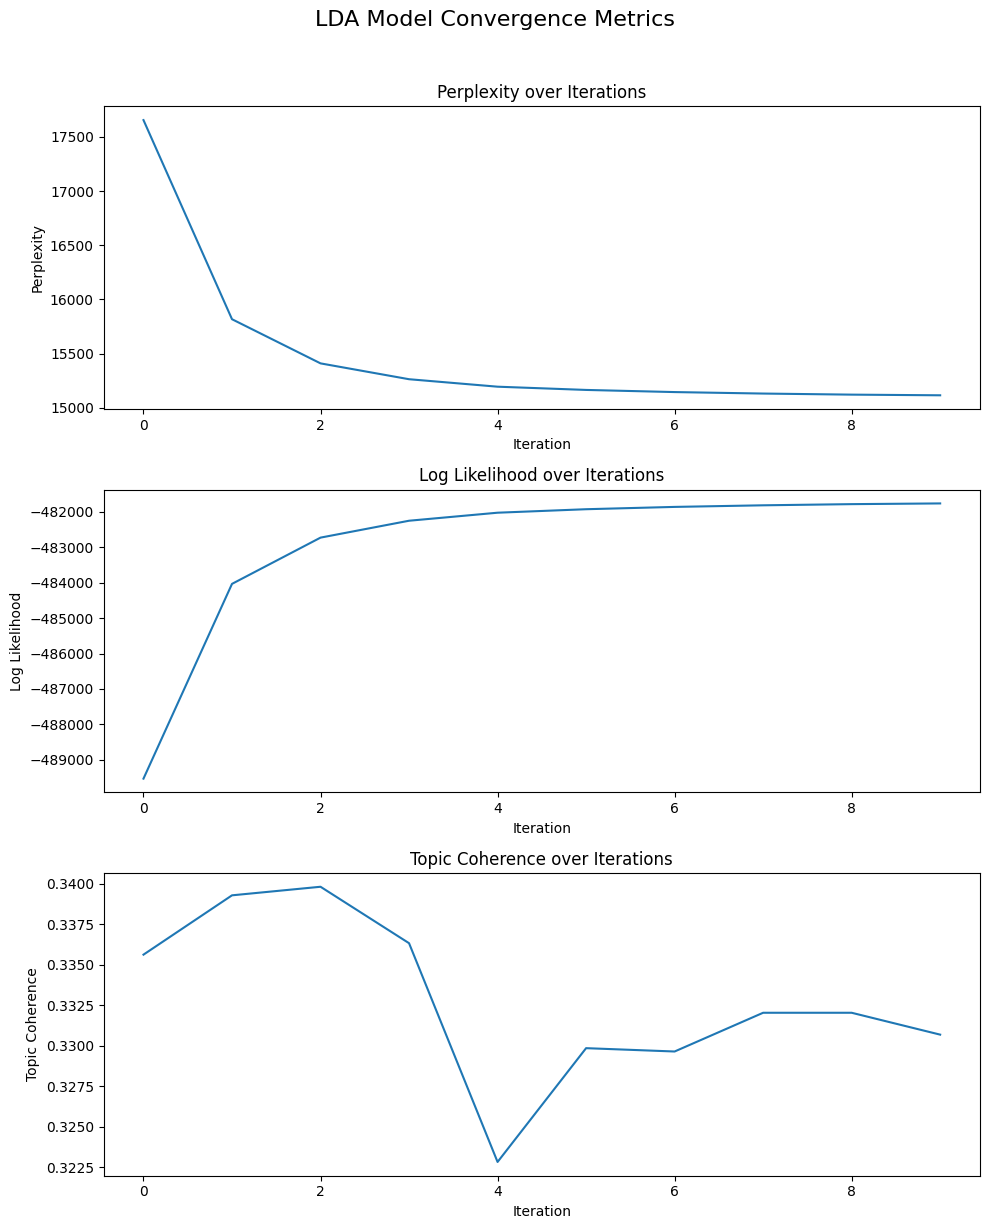

In [ ]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(3, 1, figsize=(10, 12))
axes[0].plot(lda_with_metrics.perplexity_scores)
axes[0].set_xlabel('Iteration')
axes[0].set_ylabel('Perplexity')
axes[0].set_title('Perplexity over Iterations')
axes[1].plot(lda_with_metrics.log_likelihood_scores)
axes[1].set_xlabel('Iteration')
axes[1].set_ylabel('Log Likelihood')
axes[1].set_title('Log Likelihood over Iterations')
axes[2].plot(lda_with_metrics.topic_coherence_scores)
axes[2].set_xlabel('Iteration')
axes[2].set_ylabel('Topic Coherence')
axes[2].set_title('Topic Coherence over Iterations')
fig.suptitle('LDA Model Convergence Metrics', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora.dictionary import Dictionary
import numpy as np
corpus_dictionary = Dictionary(df['tokens'])
tokenized_texts_list = df['tokens'].tolist()
topic_numbers = [5, 10, 15, 20]

coherence_scores = {}
perplexity_scores = {}
log_likelihood_scores = {}

for n_components in topic_numbers:
    print(f"Training LDA model with {n_components} topics...")

    lda_model = LatentDirichletAllocation(n_components=n_components, max_iter=10, random_state=42)
    lda_model.fit(tfidf_matrix)
    perplexity = lda_model.perplexity(tfidf_matrix)
    log_likelihood = lda_model.score(tfidf_matrix)
    feature_names = tfidf_vectorizer.get_feature_names_out()
    topics = []
    for topic in lda_model.components_:
        top_words_idx = topic.argsort()[-10:][::-1]
        top_words = [feature_names[i] for i in top_words_idx]
        topics.append(top_words)
    coherence_model = CoherenceModel(topics=topics, texts=tokenized_texts_list,
                                     dictionary=corpus_dictionary, coherence='c_v') # Using C_v coherence
    coherence_score = coherence_model.get_coherence()

    coherence_scores[n_components] = coherence_score
    perplexity_scores[n_components] = perplexity
    log_likelihood_scores[n_components] = log_likelihood

    print(f"Number of topics: {n_components}, Perplexity: {perplexity:.2f}, Log Likelihood: {log_likelihood:.2f}, Coherence: {coherence_score:.4f}")

print("\nCoherence Scores by Number of Topics:")
for num_topics, score in coherence_scores.items():
    print(f"{num_topics} topics: {score:.4f}")

print("\nPerplexity Scores by Number of Topics:")
for num_topics, score in perplexity_scores.items():
    print(f"{num_topics} topics: {score:.2f}")

print("\nLog Likelihood Scores by Number of Topics:")
for num_topics, score in log_likelihood_scores.items():
    print(f"{num_topics} topics: {score:.2f}")

Training LDA model with 5 topics...
Number of topics: 5, Perplexity: 4769.91, Log Likelihood: -530348.44, Coherence: 0.3877
Training LDA model with 10 topics...
Number of topics: 10, Perplexity: 7590.86, Log Likelihood: -559440.18, Coherence: 0.3769
Training LDA model with 15 topics...
Number of topics: 15, Perplexity: 10475.48, Log Likelihood: -579607.77, Coherence: 0.3524
Training LDA model with 20 topics...
Number of topics: 20, Perplexity: 13685.19, Log Likelihood: -596343.10, Coherence: 0.3331

Coherence Scores by Number of Topics:
5 topics: 0.3877
10 topics: 0.3769
15 topics: 0.3524
20 topics: 0.3331

Perplexity Scores by Number of Topics:
5 topics: 4769.91
10 topics: 7590.86
15 topics: 10475.48
20 topics: 13685.19

Log Likelihood Scores by Number of Topics:
5 topics: -530348.44
10 topics: -559440.18
15 topics: -579607.77
20 topics: -596343.10


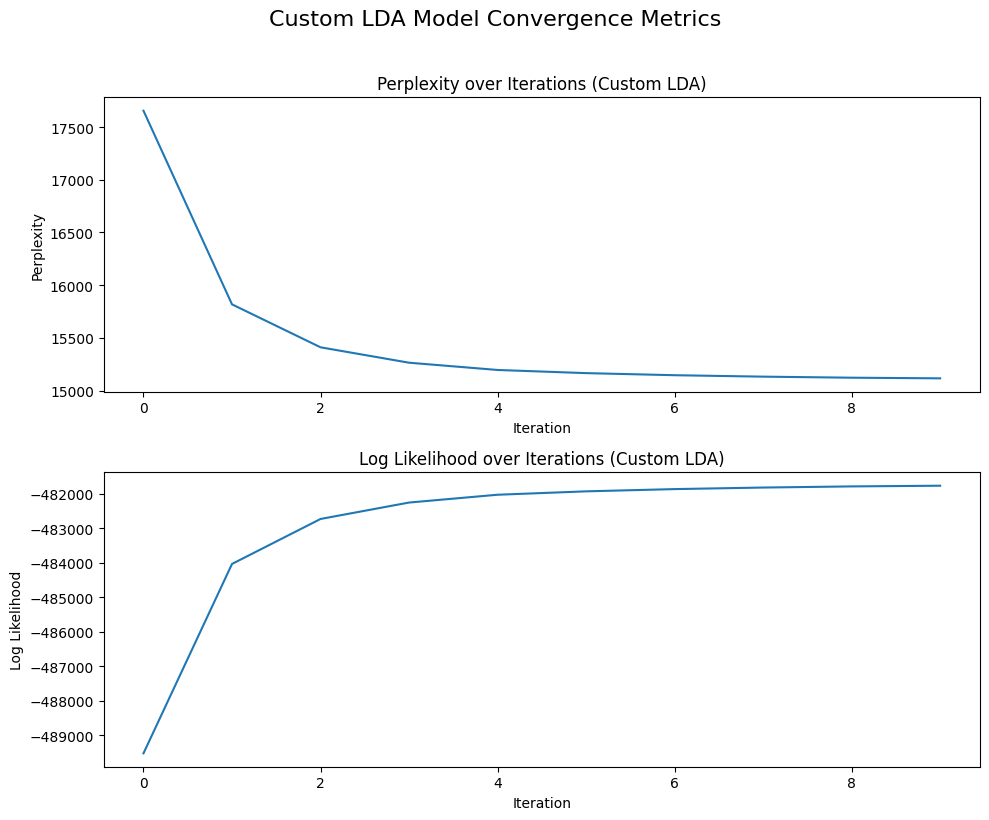

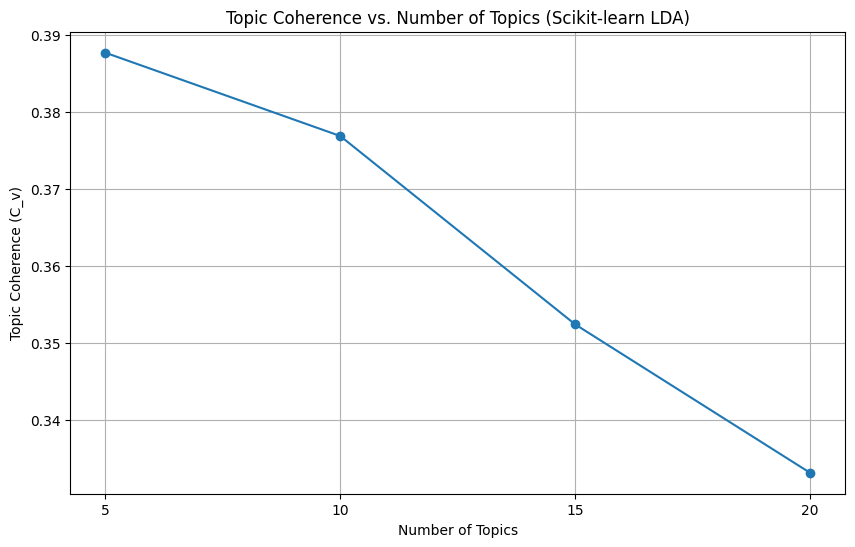

In [ ]:
import matplotlib.pyplot as plt
if 'lda_with_metrics' in locals() and lda_with_metrics is not None:
    fig, axes = plt.subplots(2, 1, figsize=(10, 8))

    axes[0].plot(lda_with_metrics.perplexity_scores)
    axes[0].set_xlabel('Iteration')
    axes[0].set_ylabel('Perplexity')
    axes[0].set_title('Perplexity over Iterations (Custom LDA)')

    axes[1].plot(lda_with_metrics.log_likelihood_scores)
    axes[1].set_xlabel('Iteration')
    axes[1].set_ylabel('Log Likelihood')
    axes[1].set_title('Log Likelihood over Iterations (Custom LDA)')

    fig.suptitle('Custom LDA Model Convergence Metrics', y=1.02, fontsize=16)
    plt.tight_layout()
    plt.show()
else:
    print("Custom LDA model metrics not available. Please run the cell with LDAModelWithMetrics first.")
if 'coherence_scores' in locals() and coherence_scores:
    topic_numbers = list(coherence_scores.keys())
    coherence_values = list(coherence_scores.values())

    plt.figure(figsize=(10, 6))
    plt.plot(topic_numbers, coherence_values, marker='o')
    plt.xlabel('Number of Topics')
    plt.ylabel('Topic Coherence (C_v)')
    plt.title('Topic Coherence vs. Number of Topics (Scikit-learn LDA)')
    plt.xticks(topic_numbers)
    plt.grid(True)
    plt.show()
else:
     print("Coherence scores for different topic numbers not available. Please run the cell exploring topic numbers first.")

### Interpretation of the 5 Topics

Based on the top words, the 5 topics can be interpreted as follows:

*   **Topic 1:** Daily Social Interactions and Online Activity (e.g., 'morning', 'good', 'twitter', 'lol', 'sorry', 'hey')
*   **Topic 2:** Work, Travel, and Missing Someone/Something (e.g., 'work', 'dont', 'go', 'miss', 'want', 'going', 'wish')
*   **Topic 3:** Evening/Night Activities and Feelings (e.g., 'cant', 'night', 'got', 'watching', 'going', 'bed', 'know')
*   **Topic 4:** Feelings and Physical States (e.g., 'like', 'feel', 'really', 'good', 'suck', 'sick', 'sleep', 'tired')
*   **Topic 5:** Holidays, Family (Mothers), and Gratitude (e.g., 'day', 'happy', 'mother', 'mom', 'thanks', 'thank')

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
final_lda_model = LatentDirichletAllocation(n_components=5, max_iter=10, random_state=42)
final_lda_model.fit(tfidf_matrix)
feature_names = tfidf_vectorizer.get_feature_names_out()
print("Top words per topic (5 Topics):")
for topic_idx, topic in enumerate(final_lda_model.components_):
    top_words_idx = topic.argsort()[-10:][::-1]
    top_words = [feature_names[i] for i in top_words_idx]
    print(f"Topic {topic_idx + 1}: {', '.join(top_words)}")

Top words per topic (5 Topics):
Topic 1: im, go, yeah, got, work, think, get, bored, suck, twitter
Topic 2: dont, im, love, miss, get, know, got, want, really, one
Topic 3: thanks, im, cant, new, see, like, love, wish, go, follow
Topic 4: im, work, going, sorry, like, feel, good, yes, sleep, nothing
Topic 5: day, happy, mother, good, morning, mom, night, time, thank, im


In [ ]:
from sklearn.linear_model import LogisticRegression
sentiment_model = LogisticRegression(random_state=42, solver='liblinear')

In [ ]:
sentiment_model.fit(X_train, y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [ ]:
y_pred = sentiment_model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

In [ ]:
from sklearn.metrics import classification_report
print("Sentiment Model Evaluation Metrics for Positive, Negative, and Neutral Categories:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (weighted): {precision:.4f}")
print(f"Recall (weighted): {recall:.4f}")
print(f"F1-score (weighted): {f1:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Sentiment Model Evaluation Metrics for Positive, Negative, and Neutral Categories:
Accuracy: 0.6832
Precision (weighted): 0.6934
Recall (weighted): 0.6832
F1-score (weighted): 0.6821

Classification Report:
              precision    recall  f1-score   support

    negative       0.72      0.55      0.62      1572
     neutral       0.62      0.76      0.68      2236
    positive       0.77      0.71      0.74      1688

    accuracy                           0.68      5496
   macro avg       0.70      0.67      0.68      5496
weighted avg       0.69      0.68      0.68      5496



In [ ]:
from sklearn.ensemble import RandomForestClassifier
sentiment_model_rf = RandomForestClassifier(random_state=42)

In [ ]:
sentiment_model_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred_rf = sentiment_model_rf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

print("Random Forest Model Evaluation Metrics for Positive, Negative, and Neutral Categories:")
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision (weighted): {precision_rf:.4f}")
print(f"Recall (weighted): {recall_rf:.4f}")
print(f"F1-score (weighted): {f1_rf:.4f}")

print("\nClassification Report (Random Forest):")
print(classification_report(y_test, y_pred_rf))

Random Forest Model Evaluation Metrics for Positive, Negative, and Neutral Categories:
Accuracy: 0.6998
Precision (weighted): 0.7034
Recall (weighted): 0.6998
F1-score (weighted): 0.6982

Classification Report (Random Forest):
              precision    recall  f1-score   support

    negative       0.73      0.58      0.65      1572
     neutral       0.66      0.73      0.69      2236
    positive       0.74      0.76      0.75      1688

    accuracy                           0.70      5496
   macro avg       0.71      0.69      0.70      5496
weighted avg       0.70      0.70      0.70      5496



In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
sentiment_model_nb = MultinomialNB(alpha=1.0)
sentiment_model_nb.fit(X_train, y_train)
sentiment_model_svm = SVC(kernel='linear', random_state=42)
sentiment_model_svm.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
y_pred_nb = sentiment_model_nb.predict(X_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb, average='weighted')
recall_nb = recall_score(y_test, y_pred_nb, average='weighted')
f1_nb = f1_score(y_test, y_pred_nb, average='weighted')
print("Naive Bayes Model Evaluation Metrics for Positive, Negative, and Neutral Categories:")
print(f"Accuracy: {accuracy_nb:.4f}")
print(f"Precision (weighted): {precision_nb:.4f}")
print(f"Recall (weighted): {recall_nb:.4f}")
print(f"F1-score (weighted): {f1_nb:.4f}")
y_pred_svm = sentiment_model_svm.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm, average='weighted')
recall_svm = recall_score(y_test, y_pred_svm, average='weighted')
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')
print("\nSVM Model Evaluation Metrics for Positive, Negative, and Neutral Categories:")
print(f"Accuracy: {accuracy_svm:.4f}")
print(f"Precision (weighted): {precision_svm:.4f}")
print(f"Recall (weighted): {recall_svm:.4f}")
print(f"F1-score (weighted): {f1_svm:.4f}")
print("\nClassification Report (Naive Bayes):")
print(classification_report(y_test, y_pred_nb))
print("\nClassification Report (SVM):")
print(classification_report(y_test, y_pred_svm))

Naive Bayes Model Evaluation Metrics for Positive, Negative, and Neutral Categories:
Accuracy: 0.6341
Precision (weighted): 0.6584
Recall (weighted): 0.6341
F1-score (weighted): 0.6304

SVM Model Evaluation Metrics for Positive, Negative, and Neutral Categories:
Accuracy: 0.6956
Precision (weighted): 0.7068
Recall (weighted): 0.6956
F1-score (weighted): 0.6946

Classification Report (Naive Bayes):
              precision    recall  f1-score   support

    negative       0.72      0.47      0.56      1572
     neutral       0.56      0.77      0.65      2236
    positive       0.73      0.61      0.67      1688

    accuracy                           0.63      5496
   macro avg       0.67      0.62      0.63      5496
weighted avg       0.66      0.63      0.63      5496


Classification Report (SVM):
              precision    recall  f1-score   support

    negative       0.73      0.57      0.64      1572
     neutral       0.63      0.77      0.69      2236
    positive       0.79  

In [ ]:
model_metrics = {
    'Logistic Regression': {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-score': f1
    },
    'Random Forest': {
        'Accuracy': accuracy_rf,
        'Precision': precision_rf,
        'Recall': recall_rf,
        'F1-score': f1_rf
    },
    'Naive Bayes': {
        'Accuracy': accuracy_nb,
        'Precision': precision_nb,
        'Recall': recall_nb,
        'F1-score': f1_nb
    },
    'SVM': {
        'Accuracy': accuracy_svm,
        'Precision': precision_svm,
        'Recall': recall_svm,
        'F1-score': f1_svm
    }
}
display(model_metrics)

{'Logistic Regression': {'Accuracy': 0.6832241630276564,
  'Precision': 0.6934130356595215,
  'Recall': 0.6832241630276564,
  'F1-score': 0.6820844769629121},
 'Random Forest': {'Accuracy': 0.6997816593886463,
  'Precision': 0.7034093037052153,
  'Recall': 0.6997816593886463,
  'F1-score': 0.6982332115338654},
 'Naive Bayes': {'Accuracy': 0.6340975254730713,
  'Precision': 0.6584498802256156,
  'Recall': 0.6340975254730713,
  'F1-score': 0.630370517494303},
 'SVM': {'Accuracy': 0.6955967976710334,
  'Precision': 0.7067799353828752,
  'Recall': 0.6955967976710334,
  'F1-score': 0.6945960171251382}}

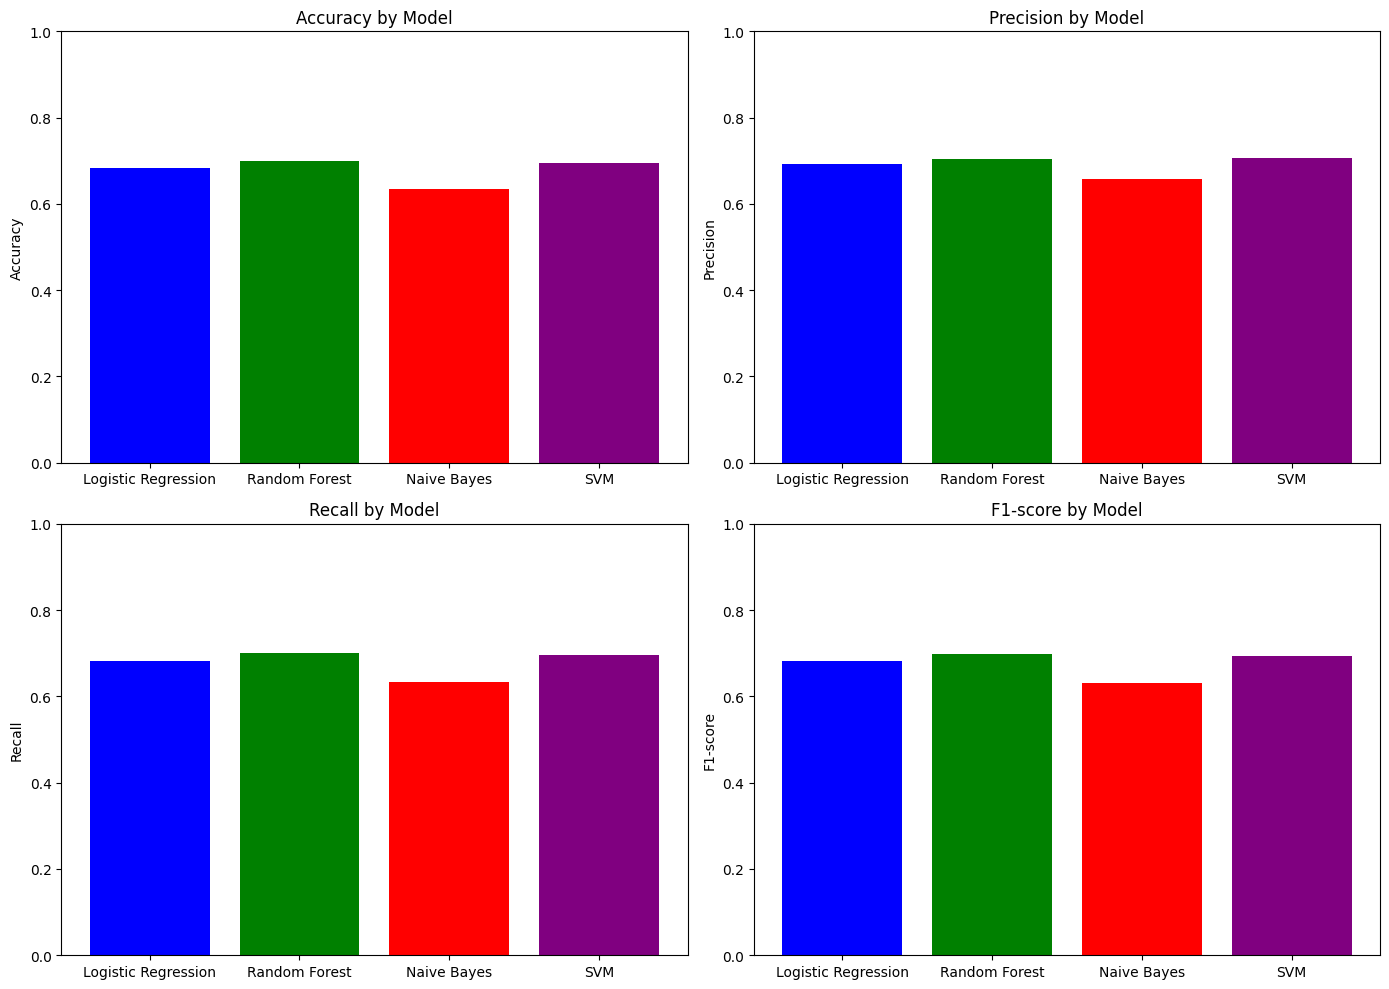

In [ ]:
import matplotlib.pyplot as plt
model_names = list(model_metrics.keys())
metric_names = ['Accuracy', 'Precision', 'Recall', 'F1-score']
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()
for i, metric in enumerate(metric_names):
    metric_values = [model_metrics[model][metric] for model in model_names]
    axes[i].bar(model_names, metric_values, color=['blue', 'green', 'red', 'purple'])
    axes[i].set_ylabel(metric)
    axes[i].set_title(f'{metric} by Model')
    axes[i].set_ylim(0, 1.0)
plt.tight_layout()
plt.show()

In [ ]:
print("Sentiment Model Performance Summary:")
print("-" * 40)
for model_name, metrics in model_metrics.items():
    print(f"Model: {model_name}")
    print(f"  Accuracy: {metrics['Accuracy']:.4f}")
    print(f"  Precision (weighted): {metrics['Precision']:.4f}")
    print(f"  Recall (weighted): {metrics['Recall']:.4f}")
    print(f"  F1-score (weighted): {metrics['F1-score']:.4f}")
    print("-" * 40)
best_model = max(model_metrics, key=lambda model: model_metrics[model]['F1-score'])
print(f"\nBased on the F1-score, the best performing model is: {best_model}")
print("Recommendation: The Random Forest model appears to be the most suitable for this sentiment analysis task based on its overall performance across the evaluated metrics, particularly the F1-score.")

Sentiment Model Performance Summary:
----------------------------------------
Model: Logistic Regression
  Accuracy: 0.6832
  Precision (weighted): 0.6934
  Recall (weighted): 0.6832
  F1-score (weighted): 0.6821
----------------------------------------
Model: Random Forest
  Accuracy: 0.6998
  Precision (weighted): 0.7034
  Recall (weighted): 0.6998
  F1-score (weighted): 0.6982
----------------------------------------
Model: Naive Bayes
  Accuracy: 0.6341
  Precision (weighted): 0.6584
  Recall (weighted): 0.6341
  F1-score (weighted): 0.6304
----------------------------------------
Model: SVM
  Accuracy: 0.6956
  Precision (weighted): 0.7068
  Recall (weighted): 0.6956
  F1-score (weighted): 0.6946
----------------------------------------

Based on the F1-score, the best performing model is: Random Forest
Recommendation: The Random Forest model appears to be the most suitable for this sentiment analysis task based on its overall performance across the evaluated metrics, particularly

In [ ]:
from transformers import T5ForConditionalGeneration, T5Tokenizer
model_name = "t5-small"
tokenizer = T5Tokenizer.from_pretrained(model_name)
model = T5ForConditionalGeneration.from_pretrained(model_name)

print(f"Loaded model: {model_name}")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/2.32k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/242M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

Loaded model: t5-small


In [ ]:
texts_to_summarize = df['text'].tolist()
inputs = tokenizer([f"summarize: {text}" for text in texts_to_summarize],
                   return_tensors="pt",
                   max_length=512,
                   truncation=True,
                   padding="max_length")

print("Text data prepared for summarization.")

Text data prepared for summarization.
